In [1]:
import os
import cv2
import random
import torch
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from utils.DiffusionUtils import DiffusionUtils
from utils.TemplateManager import TemplateManager
from utils.img_utils import load_image
from utils.exp_utils import list_exp_names, list_concept_names

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [2]:
dataset_name = "InsData_clip"
exp_names = list_exp_names(dataset_name)
cpt_names = list_concept_names(dataset_name)

===== Experiment names for InsData_clip: =====
0 0_InspirationTree
1 1_AGTree
2 1_AGTree_Seed_1000
3 1_AGTree_Seed_111
4 1_AGTree_Seed_1234
5 2_Abla_Attn
6 2_Abla_Attn_RD
7 2_Abla_Attn_RD_EMA
8 2_Abla_RD
===== Total experiments: 9 =====
===== Concept names for InsData_clip: =====
buddha
canada_bear
cat_statue
colorful_teapot
decoritems_woodenpot
elephant
green_dall
mug_buildings
mug_skulls
physics_mug
plushie_tortoise
red_teapot
round_bird
===== Total concepts: 13 =====


In [3]:
idx = 0
exp_name = exp_names[idx]
cpt_name = "colorful_teapot"
print("Experiment name:", exp_name)

exp_path = f"/home/jack/Code/Research/instree_analysis/experiments/{dataset_name}/{exp_name}"
img_path  = f"/home/jack/Code/Research/instree_analysis/experiment_data/{dataset_name}"
origin_img_path = f"{img_path}/{cpt_name}/v0/"

img_names = os.listdir(origin_img_path)
origin_img_path += random.choice(img_names)
print(f"origin_img_path: {origin_img_path}")

multi_seed_idx = [0]
if idx in multi_seed_idx:
    concept_path = f"{exp_path}/outputs/{cpt_name}/v0/learned_embeds.bin"
    result_path = f"{exp_path}/outputs/{cpt_name}/v0/final_samples.jpg"
else:
    concept_path = f"{exp_path}/outputs/{cpt_name}/v0/v0_seed0/learned_embeds.bin"
    result_path = f"{exp_path}/outputs/{cpt_name}/v0/v0_seed0/final_samples.jpg"
concepts = torch.load(concept_path)

DiffusionUtils.reset_vocab()
DiffusionUtils.add_new_vocab('<sl>', concepts['<*>'])
DiffusionUtils.add_new_vocab('<sr>', concepts['<&>'])

Experiment name: 0_InspirationTree
origin_img_path: /home/jack/Code/Research/instree_analysis/experiment_data/InsData_clip/colorful_teapot/v0/1.jpg
Vocabulary has been reset.
Current vocab size:  49408
New token added:  <sl>
Current vocab size:  49409
All new tokens:  {'<sl>': 49408}
New token added:  <sr>
Current vocab size:  49410
All new tokens:  {'<sl>': 49408, '<sr>': 49409}


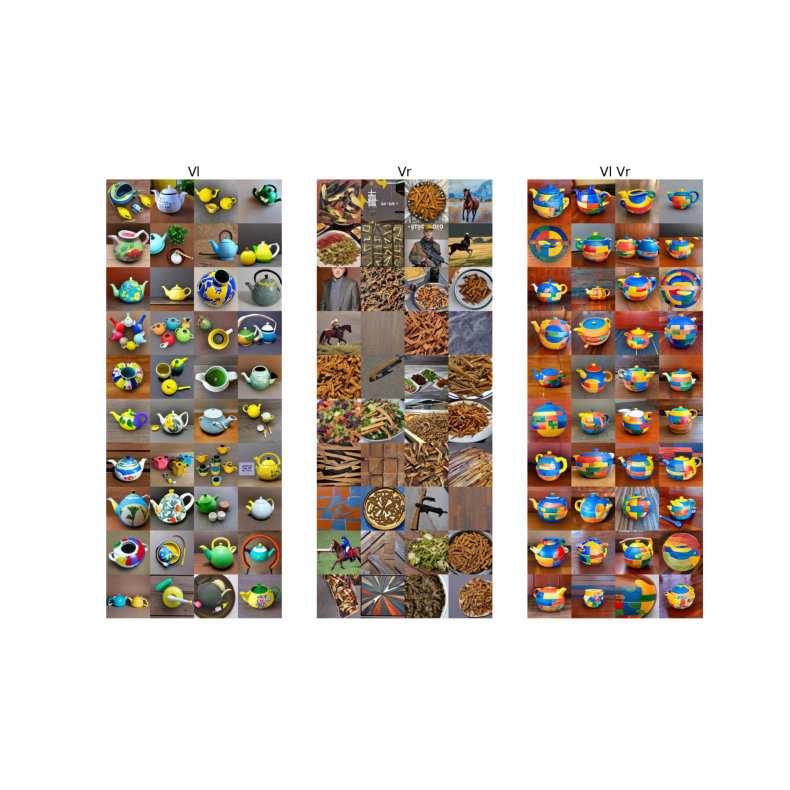

In [4]:
img = load_image(result_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
print(DiffusionUtils.calculate_token_cosine_similarity('<sl>'))
print(DiffusionUtils.calculate_token_cosine_similarity('<sr>'))

[('cigarettes</w>', 0.20413152873516083), ('paella</w>', 0.18502698838710785), ('mackerel</w>', 0.16925475001335144), ('ukulele</w>', 0.1661863774061203), ('teapot</w>', 0.16595658659934998), ('selcaday</w>', 0.16274236142635345), ('snapback</w>', 0.16205206513404846), ('riesling</w>', 0.161728173494339), ('ipad', 0.15633368492126465), ('csa</w>', 0.15612873435020447)]
[('effici', 0.15268631279468536), ('metroid</w>', 0.1454271823167801), ('chipot', 0.14523623883724213), ('tris</w>', 0.1430252343416214), ('brie</w>', 0.14204728603363037), ('charli</w>', 0.1409674435853958), ('rach', 0.14025822281837463), ('pecan</w>', 0.13691340386867523), ('shiro</w>', 0.13622887432575226), ('duck</w>', 0.13384795188903809)]
